# LetsGrowMore


# TASK 1


DONE BY - PRIYA KUMARI


# Iris Flowers Classification ML Project 

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt  
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

In [2]:
# Reading data and arranging data
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'specie']
df = pd.read_csv("C://Users//ps505//Documents//Python Scripts//iris.csv", names = columns)
print("Data imported successfully")

df

Data imported successfully


,sepal_length,sepal_width,petal_length,petal_width,specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#first 5 records
df.head()

,sepal_length,sepal_width,petal_length,petal_width,specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#last 5 records
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,specie
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
shape = df.shape
print(f'The data set has {shape[0]} rows and {shape[1]} columns')

The data set has 150 rows and 5 columns


In [6]:
#Let's print the full summary of the dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   specie        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#let's see percentiles,mean,std,max,count of the given dataset.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['specie'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: specie, dtype: int64

In [9]:
df.sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

# VISUALIZING DATA

In [10]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000011'

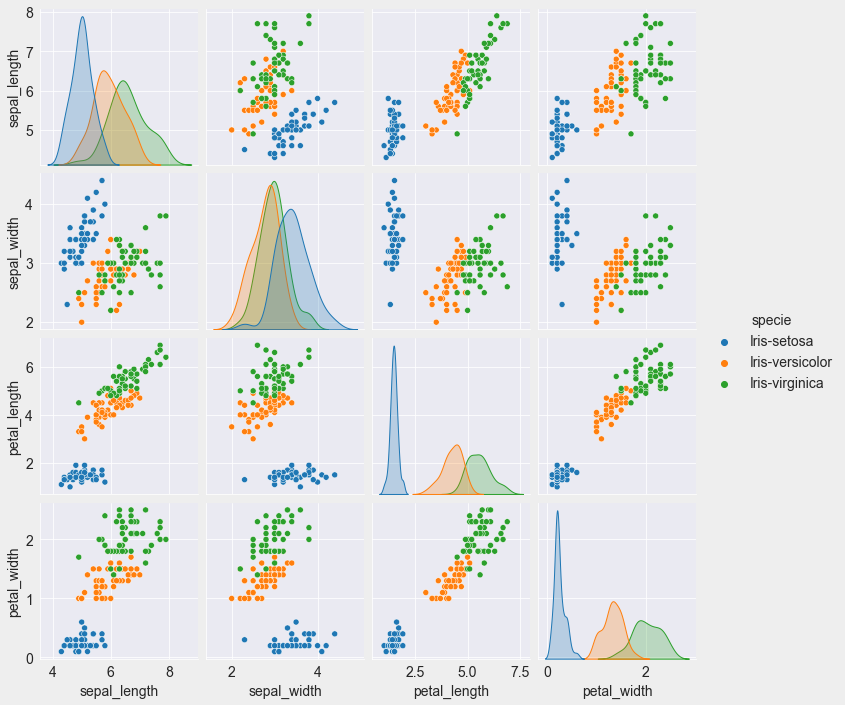

In [11]:
sns.pairplot(df,hue="specie")

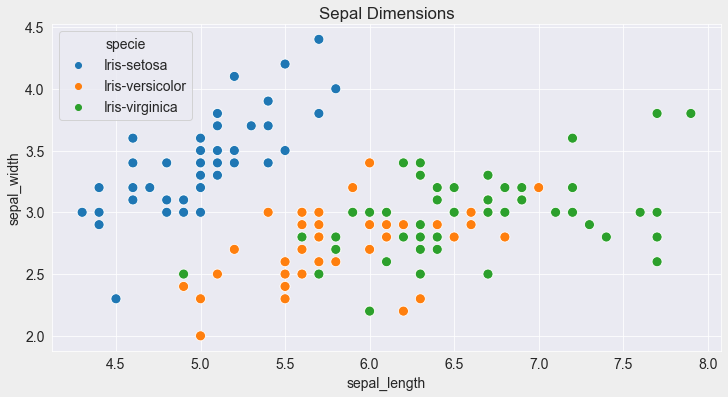

In [12]:
plt.figure(figsize=(12,6))
plt.title('Sepal Dimensions')
sns.scatterplot(x =df.sepal_length, y = df.sepal_width, hue = df.specie, s = 100);

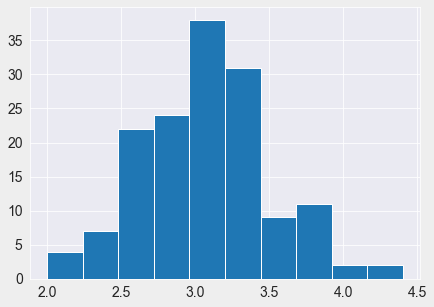

In [13]:
plt.hist(df.sepal_width);

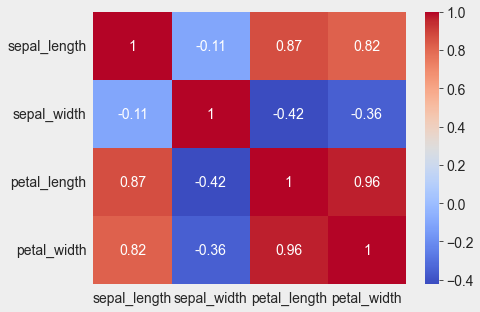

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Building Model , Training and Testing


In [15]:
# Preparing Data and splitting into train and test sets.
x = df.iloc[:, [0,1,2, 3]].values
y = df.iloc[:, 4].values
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [16]:
# Feature Scaling 
sc = StandardScaler()
x_train_df = sc.fit_transform(x_train_df)
x_test_df = sc.transform(x_test_df)

# 1. Logistic Regression

In [17]:
# Initialize a Logistic Regression
lg= LogisticRegression(max_iter=1000)
lg.fit(x_train_df,y_train_df)

LogisticRegression(max_iter=1000)

In [18]:
model = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
model.fit(x_train_df, y_train_df)

LogisticRegression(random_state=0)

In [19]:
# Predict on the test set and calculate accuracy
y_pred=lg.predict(x_test_df)
probs_y = model.predict_proba(x_test_df)
probs_y = np.round(probs_y, 2)

In [20]:
result = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test_df", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
result += "-"*65+"\n"
result += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test_df, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
result += "\n"+"-"*65+"\n"
print(result)

y_test_df  | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
Iris-virginica | Iris-virginica | 0.0        | 0.03          | 0.97      
Iris-versicolor | Iris-versicolor | 0.01       | 0.95          | 0.05      
Iris-setosa | Iris-setosa | 1.0        | 0.0           | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.09          | 0.91      
Iris-setosa | Iris-setosa | 0.97       | 0.03          | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.01          | 0.99      
Iris-setosa | Iris-setosa | 0.98       | 0.02          | 0.0       
Iris-versicolor | Iris-versicolor | 0.01       | 0.71          | 0.28      
Iris-versicolor | Iris-versicolor | 0.0        | 0.73          | 0.27      
Iris-versicolor | Iris-versicolor | 0.02       | 0.89          | 0.09      
Iris-virginica | Iris-virginica | 0.0        | 0.44          | 0.56      
Iris-versicolor | Iris-versicolor | 0.02       | 0.75         

In [21]:
conf_mat = confusion_matrix(y_test_df, y_pred)
print(conf_mat)


[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


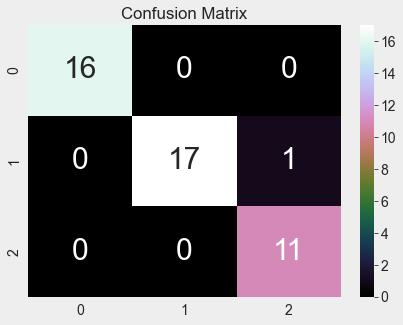

In [22]:
axes = plt.axes()
conf_mat_df = conf_mat
sns.heatmap(conf_mat_df, annot=True, annot_kws={"size": 30}, fmt='d',cmap="cubehelix", ax = axes )
axes.set_title('Confusion Matrix')
plt.show()